# Machine Learning Project

# Assignment: Perform the following analyses on gum_disease_data.txt 
## The features will be the bacterial species abundances and the classifier will be status. 

## (1) Run a Decision Tree classifier.
## (2) Run a Support Vector Machine analysis.
## The next item is not graded ->
## (3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow


## Data manipulation and plotting libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, ConfusionMatrixDisplay

## Decision Tree libraries

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

## SVM Libraries

In [195]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

In [196]:
# Additional Libraries

In [197]:
import tensorflow as tf
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split

## Read in data set

In [198]:
##DO NOT CHANGE THIS LINE OF CODE
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## Training set for all analyses

In [205]:
## FIX THIS EXAMPLE 
#Tried doing the following and it did not work:
#df['status'] = df['status'].astype('category')
#X = df.values[:, 1:5]
#Y= df.values[:, 7]

df['status'] = df['status'].astype('int')
#Changed it to be an integer class as for some reason it was giving me weird errors if I didn't

X = df[['strep', 'prev', 'lepto', 'fuso', 'veil']] 
#X = df.iloc[:, 1:5]
#Setting our bacterial species abundance columns as our features

Y = df['status']
#Y = df.iloc[:, 7]
#Setting our 'status' as the classifier (it is an integer)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 100)

## Part 1

## Decision Tree Analysis

In [206]:
#Tried this alternate method that I also could not get to work:
'''
def splitdataset(df):
    X = df.values[:, 1:5]
    Y = df.values[:, 7]
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size = 0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test

def train_using_gini(X_train, X_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini
def importdata():
    balance_data = df


def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(df)
 
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
 
    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4', 'X5'], ['0', '1', '0', '0', '1'])

print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
'''

'\ndef splitdataset(df):\n    X = df.values[:, 1:5]\n    Y = df.values[:, 7]\n    X_train, X_test, y_train, y_test = train_test_split(\n        X, Y, test_size = 0.3, random_state=100)\n    return X, Y, X_train, X_test, y_train, y_test\n\ndef train_using_gini(X_train, X_test, y_train):\n    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3, min_samples_leaf=5)\n    clf_gini.fit(X_train, y_train)\n    return clf_gini\ndef importdata():\n    balance_data = df\n\n\ndef prediction(X_test, clf_object):\n    y_pred = clf_object.predict(X_test)\n    print("Predicted values:")\n    print(y_pred)\n    return y_pred\n\ndef plot_decision_tree(clf_object, feature_names, class_names):\n    plt.figure(figsize=(15, 10))\n    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)\n    plt.show()\n\nif __name__ == "__main__":\n    data = importdata()\n    X, Y, X_train, X_test, y_train, y_test = splitdataset(df)\n \n    c

## Generate Decision Tree

[Text(0.5, 0.75, 'x[3] <= 9.9\ngini = 0.457\nsamples = 48\nvalue = [31, 17]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]')]

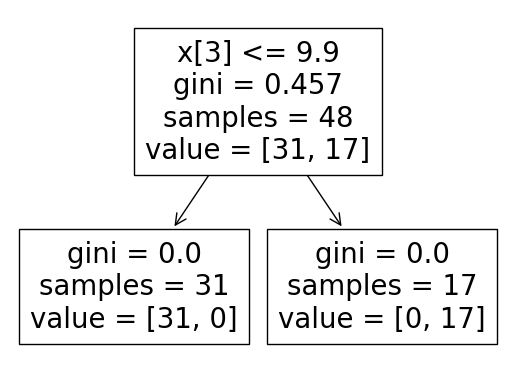

In [207]:
gini_in_a_bottle = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
fit = gini_in_a_bottle.fit(X_train, y_train)
tree.plot_tree(fit)

## Show gini prediction

In [208]:
#input = [[23.5,10.4,6.7,9.8,43.5]]

#prediction = gini_in_a_bottle.predict(input)
#print(prediction)

gini_in_a_bottle.predict([[23.5,10.4,6.7,9.8,43.5]])

y_pred = gini_in_a_bottle.predict(X_test)

#It seems that the gini for this was 0.457

/Users/rileyjones/anaconda3/envs/pandas_practice/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Print accuracy

In [209]:
print('Accuracy is', metrics.accuracy_score(y_test,y_pred)*100,'%')
#Accuracy is 95.83%?
#Somehow it changed back to 100%

#Alternative accuracy measurements:
#predi = gini_in_a_bottle.predict(X_test)
#errorz = abs(predi - X_test)
#print('Mean absolute error:', round(np.mean(errorz), 2), 'degrees.')

#mape = 100* (errors/y_test)
#accu = 100 - np.mean(mape)
#print('Accuracy:', round(accu, 2), '%.')
#Couldn't get this to work either

Accuracy is 100.0 %


## Create dot file of Decision Tree

In [210]:
#estimator_nonlimited = gini_in_a_bottle.estimators_[5]

export_graphviz(decision_tree = gini_in_a_bottle, out_file='tree_nonlimited.dot', feature_names=['strep', 'prev', 'lepto', 'fuso', 'veil'], 
                class_names=['status'],
                rounded=True, proportion=False, precision=2, filled=True)

IndexError: index 1 is out of bounds for axis 0 with size 1

## Part 2

## Support Vector Machine

## Visualize the first 5 rows of the dataset

In [80]:
df.head(n = 5)

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

/Users/rileyjones/anaconda3/envs/pandas_practice/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rileyjones/anaconda3/envs/pandas_practice/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rileyjones/anaconda3/envs/pandas_practice/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rileyjones/anaconda3/envs/pandas_practice/lib/python3.9/site-packages/seaborn/_oldcore.py:111

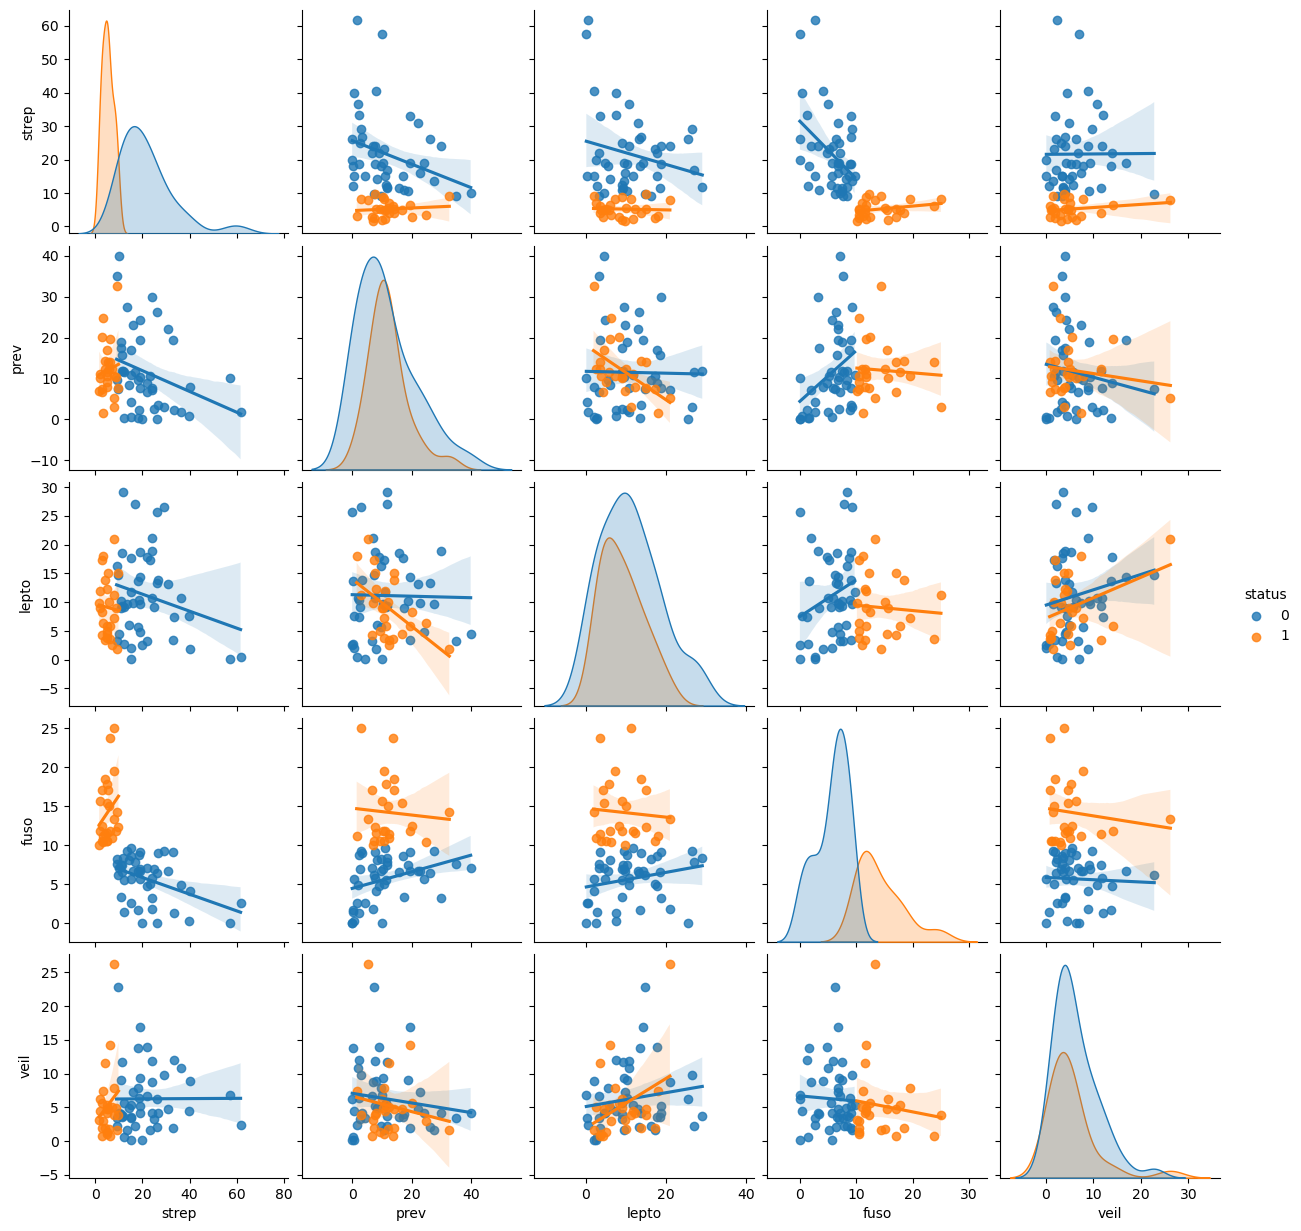

In [81]:
spec = ['strep','prev','lepto','fuso','veil','status']
stat_colors = {'1': 'red', '2': 'blue'}
pairwise_plot=sns.pairplot(df[spec], hue = "status", height= 2.5, kind = 'reg')
#Not sure if this is the way to do so? With a regression, this will show how one variable changes with another variable
#Should choose the plot that has a line most parallel to the x or y axis
#Looks like fuso and strep?

## Make the training and testing arrays

In [52]:
#data_norm = pd.DataFrame(df[:, 1:6])

data_norm = df.iloc[:, 1:5]
data_norm = pd.DataFrame(data_norm)

for feature in data_norm:
    data_norm[feature] = (data_norm[feature] - data_norm[feature].mean())/data_norm[feature].std()

#Show that should now have zero mean
print("Averages") 
print(data_norm.mean())
#Eh, close enough 

Averages
strep   -1.356939e-16
prev     1.850372e-17
lepto   -8.018277e-17
fuso    -2.467162e-17
dtype: float64


# Part A) Non-linear SVM Classifier

## Train the SVM model

In [113]:
law_and_order_svm = svm.SVC(kernel = 'poly', degree = 3)

law_and_order_svm.fit(X_train, y_train)

y_pred = law_and_order_svm.predict(X_test)

## SVM model predictions on the test data

In [114]:
#Not sure if this is what is being asked?
#Anyways, used information from this link: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
y_pred = law_and_order_svm.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
#Apparently our recall score is amazing

Accuracy: 0.9583333333333334
Precision: 0.9
Recall: 1.0


## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

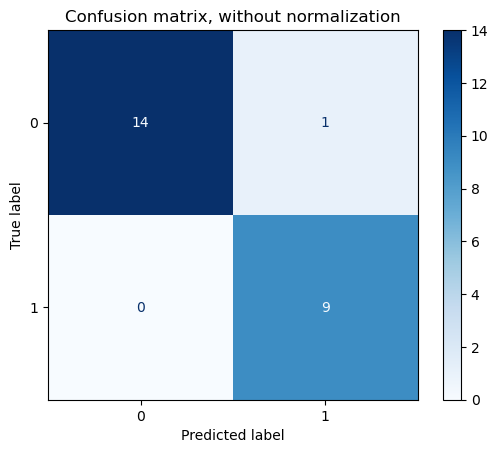

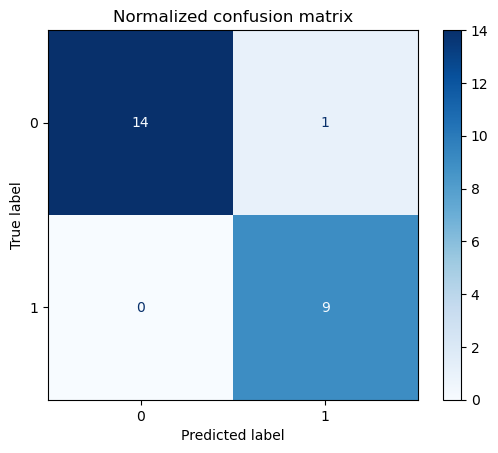

In [115]:
class_names = df['status'].unique()
cm = confusion_matrix(y_test,y_pred)
#For some reason this NEEDS to be named 'cm'
#I had tried to adapt the following code with a differently named confusion matrix ('catrix_of_monfusion') but it would not work
#This code is even adapted from here too but remains very picky: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal', values_format=None)
    plt.title(title)

plt.show()
#Seems that it's pretty good with only one false negative?

## Show Decision Boundary Plot

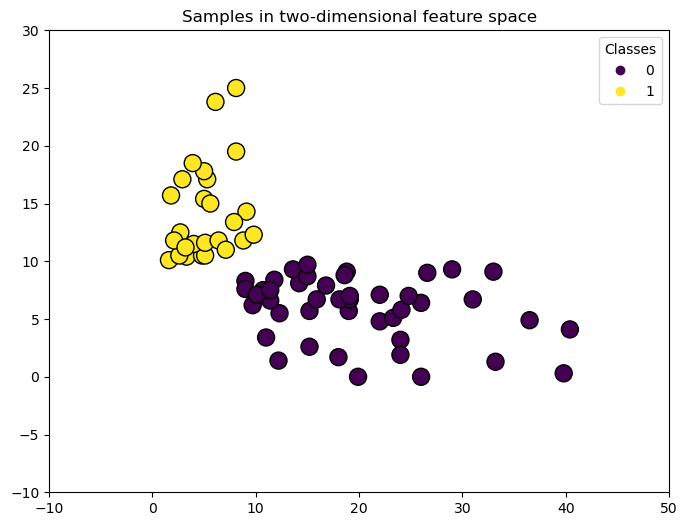

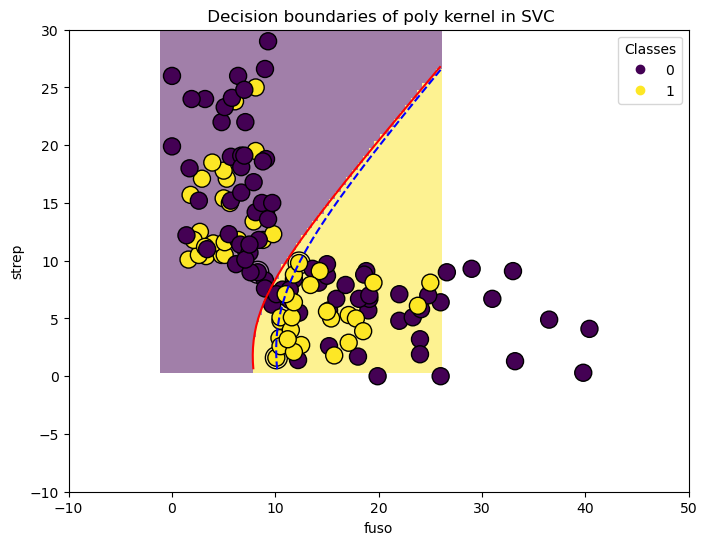

In [179]:
#Big shoutout to scikit learn https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
#Updating X to be fuso and strep
X = df[['fuso','strep']]
y = df['status']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

svm_classifier = svm.SVC(kernel='poly', degree=3)  
svm_classifier.fit(X_train, y_train)

# Plotting settings
fig, ax = plt.subplots(figsize=(8, 6))
x_min, x_max, y_min, y_max = -10, 50, -10, 30
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X['strep'], X['fuso'], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()


def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(8, 6))
    x_min, x_max, y_min, y_max = -10, 50, -10, 30
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        #levels=[-1, 0, 1],
        #colors=["k", "k", "k"],
        #linestyles=["--", "-", "--"],
        levels=[ 0, 1],
        colors=[ "red", "blue"],
        linestyles=[ "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="black",   
    )
    # Plot samples by color and add legend
    scatter = ax.scatter(X['strep'], X['fuso'], c=y, s=150, edgecolors="black")
    ax.scatter(X['fuso'], X['strep'], c=y, s=150, edgecolors="black")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

plot_training_data_with_decision_boundary("poly")

#Additionally, the prediction box(?) is much too small to encompass the data

# Part B) Linear SVM Classifier

## Train the linear classifier

In [162]:
mom_van = svm.SVC(kernel = 'linear')

mom_van.fit(X_train, y_train)

y_pred = mom_van.predict(X_test)

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

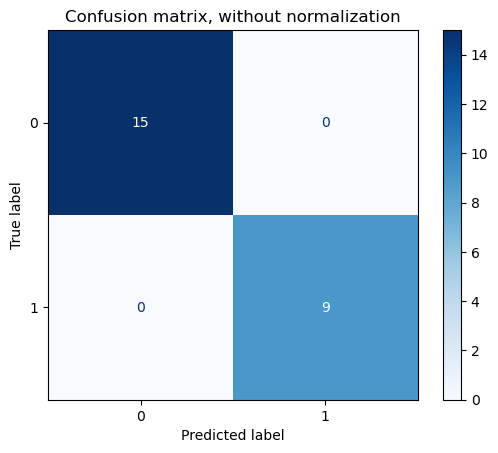

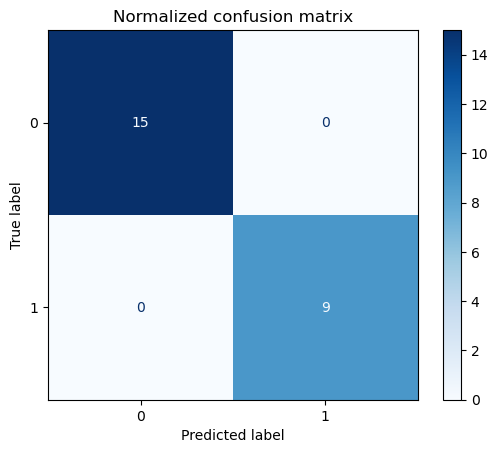

In [163]:
class_names = df['status'].unique()
cm = confusion_matrix(y_test,y_pred)
#For some reason this NEEDS to be named 'cm'
#I had tried to adapt the following code with a differently named confusion matrix ('catrix_of_monfusion') but it would not work
#This code is even adapted from here too but remains very picky: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal', values_format=None)
    plt.title(title)

plt.show()
#Oh so this improved it? Now we have 15 true negatives and 9 true positives?

## Show Precision and Recall scores

In [164]:
y_pred = mom_van.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
#Apparently ALL of our scores are 1.0?????????????????????????????????? hM?

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Show Decision Boundary Plot

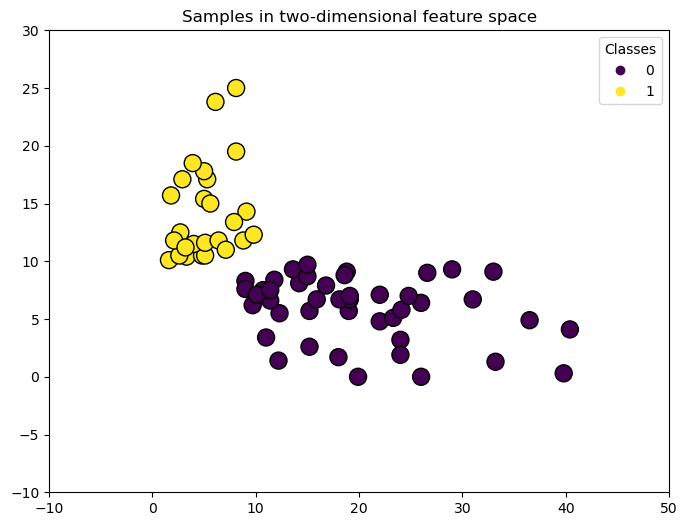

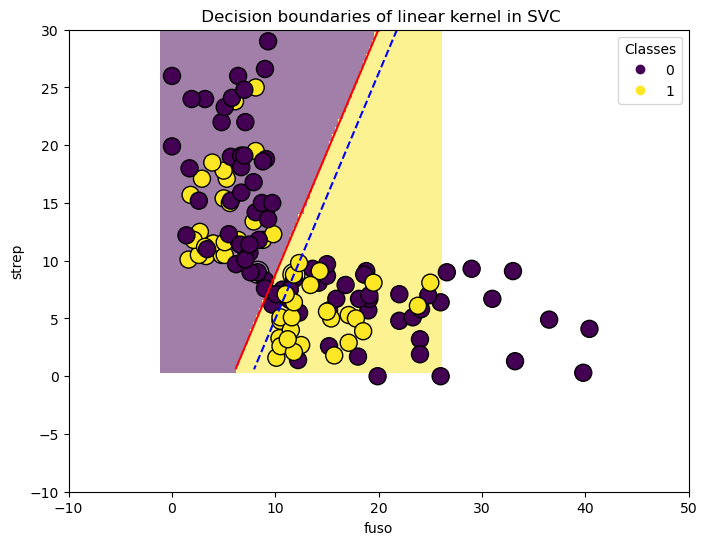

In [167]:
X = df[['fuso','strep']]
y = df['status']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

svm_classifier = svm.SVC(kernel='linear')  
svm_classifier.fit(X_train, y_train)

# Plotting settings
fig, ax = plt.subplots(figsize=(8, 6))
x_min, x_max, y_min, y_max = -10, 50, -10, 30
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X['strep'], X['fuso'], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()


def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(8, 6))
    x_min, x_max, y_min, y_max = -10, 50, -10, 30
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        #levels=[-1, 0, 1],
        #colors=["k", "k", "k"],
        #linestyles=["--", "-", "--"],
        levels=[ 0, 1],
        colors=[ "red", "blue"],
        linestyles=[ "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",

        
    )
    # Plot samples by color and add legend
    scatter = ax.scatter(X['strep'], X['fuso'], c=y, s=150, edgecolors="k")
    ax.scatter(X['fuso'], X['strep'], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

plot_training_data_with_decision_boundary("linear")

# Part C) Neural Network extra credit